In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import seaborn as sns
sns.set()
import pandas as pd
import gc
gc.collect()
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
from tqdm import tqdm

from pyhive import presto
import requests
from requests.auth import HTTPBasicAuth
import pandas as pd
requests.packages.urllib3.disable_warnings()
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import gc
gc.collect()
gc.collect()

tqdm.pandas()

city='Bangalore'
start_date='2020-01-27'
end_date='2020-02-09' 

data_file='time_v1_{city}_{start_date}_{end_date}.csv'.format(city=city,start_date=start_date,end_date=end_date)

tqdm.pandas()
def download_data(city,start_date,end_date,data_file):
    conn = presto.connect(
        host='10.160.0.62',
        port=8060,
        protocol='http',
        catalog='hive',
        schema='mongodb',
        username='ronak',
        # requests_kwargs=req_kw,
    )
    order_date_query_test = """Select _id as orderid,subtotal,allpaths,ridetime,services,status,serviceobj_city as city,orderdate from mongodb.orders
where (status ='dropped') and  (serviceobj_city='{city}') and orderdate BETWEEN '{start_date}' and '{end_date}'
""".format(city=city,start_date=start_date,end_date=end_date)
    df_order_date_test = pd.read_sql(order_date_query_test, conn)
    df_order_date_test.to_csv(data_file)


download_data(city,start_date,end_date,data_file)

/home/ronak/anaconda3/lib/python3.7/site-packages/tqdm/std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [96]:
city='Bangalore'
start_date='2020-01-27'
end_date='2020-02-09' 

data_file='time_v1_{city}_{start_date}_{end_date}.csv'.format(city=city,start_date=start_date,end_date=end_date)


In [109]:
orders=pd.read_csv(data_file)

In [110]:
orders.shape

(842713, 9)

In [111]:
orders=pd.read_csv(data_file)
def drop_unnamed(df):
    return df.loc[:, ~df.columns.str.contains('^Unnamed')]
orders=drop_unnamed(orders)

import re
def get_time_from_allpaths(test_str):
    m =re.search('\'time\': [0-9]*', test_str)
    if m:
        found = m.group(0)
        return [int(s) for s in found.split() if s.isdigit()][0]
orders.loc[:,'g_time_secs']=orders.allpaths.progress_apply(get_time_from_allpaths)
orders.dropna(subset=['g_time_secs'],inplace=True)
orders['g_time_secs']=orders['g_time_secs'].astype(int)
orders.loc[:,'ride_time_secs']=(orders['ridetime']*60).astype(int)
orders.head()
orders.loc[:,'diff_abs']=abs(orders['g_time_secs']-orders['ride_time_secs'])


100%|██████████| 842713/842713 [00:02<00:00, 349360.47it/s]


,orderid,subtotal,allpaths,ridetime,services,status,city,orderdate,g_time_secs,ride_time_secs
0,5e3d830ce42ea84f6cae80ac,69.0,"[{'distance': 7486.3, 'time': 1300.7, 'polylin...",27.002133,"[{'serviceId': '574013f14fdf4798208bba26', 'mi...",dropped,Hyderabad,2020-02-07,1300,1620
3,5e3d83106735ce3fc330c260,33.0,"[{'distance': 3292.7, 'time': 577.5, 'polyline...",13.105033,"[{'serviceId': '574013f14fdf4798208bba26', 'mi...",dropped,Hyderabad,2020-02-07,577,786
4,5e3d831167be1d6954656d91,38.0,"[{'distance': 3556, 'time': 792, 'polyline': '...",11.784833,"[{'serviceId': '574013f14fdf4798208bba26', 'mi...",dropped,Hyderabad,2020-02-07,792,707
5,5e3d83126735ce3fc330c263,32.0,"[{'distance': 3010, 'time': 578, 'polyline': '...",6.767350,"[{'serviceId': '574013f14fdf4798208bba26', 'mi...",dropped,Hyderabad,2020-02-07,578,406
6,5e3d83136c2b60097fdcc861,44.0,"[{'distance': 4598, 'time': 917, 'polyline': '...",10.948667,"[{'serviceId': '574013f14fdf4798208bba26', 'mi...",dropped,Hyderabad,2020-02-07,917,656


In [112]:
orders.shape

(582929, 11)

==================Bangalore : Diff in G_Time and Actual Time==============


count    475143.000000
mean        294.464951
std         453.026274
min           0.000000
20%          66.000000
30%         102.000000
40%         141.000000
50%         185.000000
60%         238.000000
70%         309.000000
80%         416.000000
90%         634.000000
95%         920.000000
98%        1414.160000
max       73557.000000
Name: diff_abs, dtype: float64

Text(0.5, 1.0, 'Bangalore: # of orders on y, diff in g_time, actual time on x')

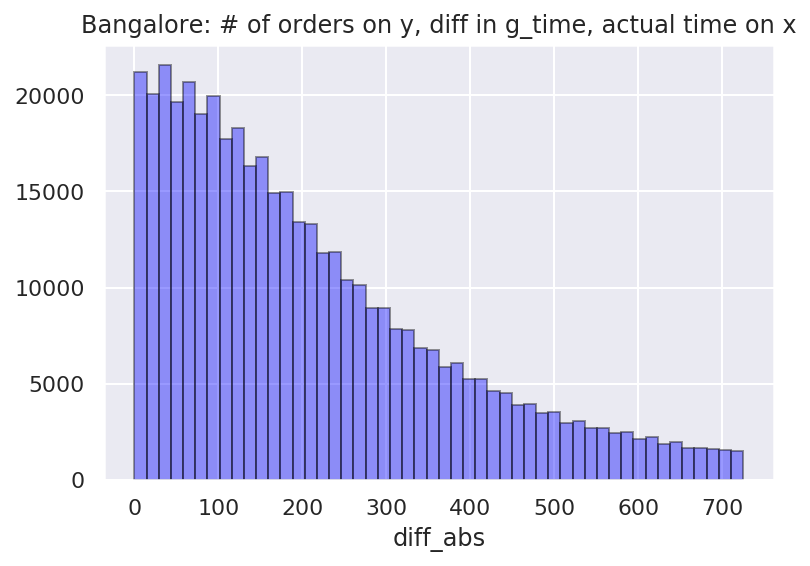

In [100]:
print('==================Bangalore : Diff in G_Time and Actual Time==============')
orders.diff_abs.describe(percentiles=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.98])

sns.distplot(orders[orders.diff_abs<726]['diff_abs'], hist=True, kde=False, color = 'blue',
             hist_kws={'edgecolor':'black'}).set_title('Bangalore: # of orders on y, diff in g_time, actual time on x')

#### Hyderabad

In [102]:
city='Hyderabad'
start_date='2020-01-27'
end_date='2020-02-09' 

data_file='time_v1_{city}_{start_date}_{end_date}.csv'.format(city=city,start_date=start_date,end_date=end_date)


In [103]:
orders=pd.read_csv(data_file)
def drop_unnamed(df):
    return df.loc[:, ~df.columns.str.contains('^Unnamed')]
orders=drop_unnamed(orders)

import re
def get_time_from_allpaths(test_str):
    m =re.search('\'time\': [0-9]*', test_str)
    if m:
        found = m.group(0)
        return [int(s) for s in found.split() if s.isdigit()][0]
orders.loc[:,'g_time_secs']=orders.allpaths.progress_apply(get_time_from_allpaths)
orders.dropna(subset=['g_time_secs'],inplace=True)
orders['g_time_secs']=orders['g_time_secs'].astype(int)
orders.loc[:,'ride_time_secs']=(orders['ridetime']*60).astype(int)
orders.head()
orders.loc[:,'diff_abs']=abs(orders['g_time_secs']-orders['ride_time_secs'])

100%|██████████| 842713/842713 [00:02<00:00, 348225.83it/s]


,orderid,subtotal,allpaths,ridetime,services,status,city,orderdate,g_time_secs,ride_time_secs
0,5e3d830ce42ea84f6cae80ac,69.0,"[{'distance': 7486.3, 'time': 1300.7, 'polylin...",27.002133,"[{'serviceId': '574013f14fdf4798208bba26', 'mi...",dropped,Hyderabad,2020-02-07,1300,1620
3,5e3d83106735ce3fc330c260,33.0,"[{'distance': 3292.7, 'time': 577.5, 'polyline...",13.105033,"[{'serviceId': '574013f14fdf4798208bba26', 'mi...",dropped,Hyderabad,2020-02-07,577,786
4,5e3d831167be1d6954656d91,38.0,"[{'distance': 3556, 'time': 792, 'polyline': '...",11.784833,"[{'serviceId': '574013f14fdf4798208bba26', 'mi...",dropped,Hyderabad,2020-02-07,792,707
5,5e3d83126735ce3fc330c263,32.0,"[{'distance': 3010, 'time': 578, 'polyline': '...",6.767350,"[{'serviceId': '574013f14fdf4798208bba26', 'mi...",dropped,Hyderabad,2020-02-07,578,406
6,5e3d83136c2b60097fdcc861,44.0,"[{'distance': 4598, 'time': 917, 'polyline': '...",10.948667,"[{'serviceId': '574013f14fdf4798208bba26', 'mi...",dropped,Hyderabad,2020-02-07,917,656


In [108]:
print('============Hyderabad: Diff in G_Time and Actual Time=============')
orders.diff_abs.describe(percentiles=[0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.98])

============Hyderabad: Diff in G_Time and Actual Time=============


count    582929.000000
mean        250.925818
std         419.801301
min           0.000000
20%          61.000000
30%          93.000000
40%         128.000000
50%         167.000000
60%         213.000000
70%         273.000000
80%         359.000000
90%         524.000000
95%         726.000000
98%        1090.000000
max       74773.000000
Name: diff_abs, dtype: float64

Text(0.5, 1.0, 'Hyderabad: # of orders on y, diff in g_time, actual time on x')

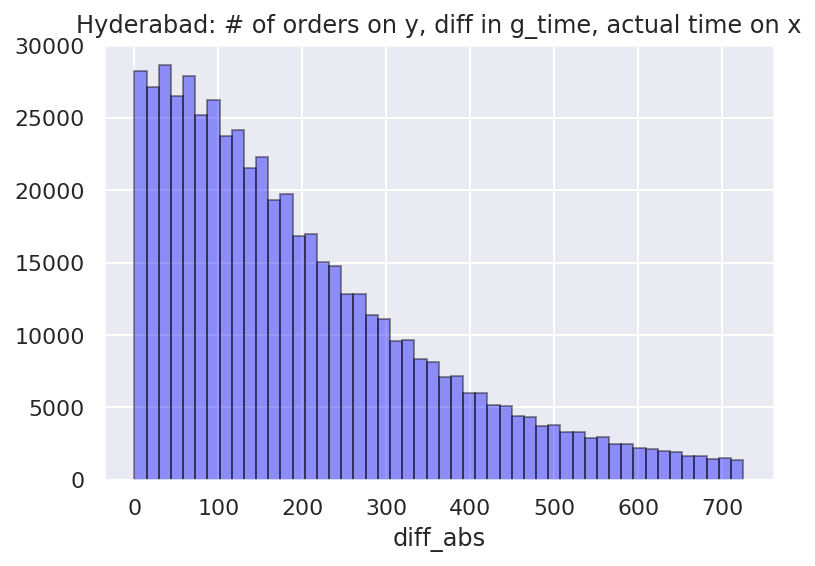

In [107]:
sns.distplot(orders[orders.diff_abs<726]['diff_abs'], hist=True, kde=False, color = 'blue',
             hist_kws={'edgecolor':'black'}).set_title('Hyderabad: # of orders on y, diff in g_time, actual time on x')

In [82]:
diff_time=orders.diff_abs.value_counts().sort_index().reset_index().rename(columns={'index':'diff_in_secs','diff_abs':'# of orders'})

In [83]:
diff_time.head()

,diff_in_secs,# of orders
0,0,1015
1,1,1978
2,2,1923
3,3,1861
4,4,1936


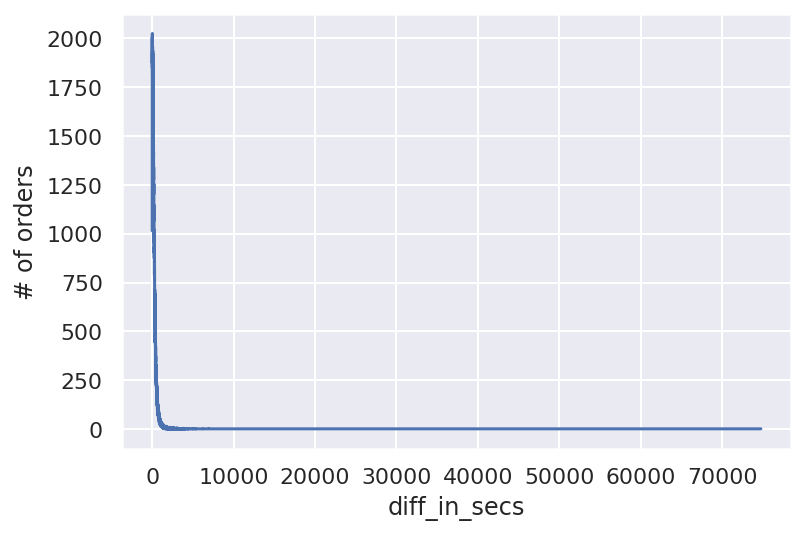

In [84]:
sns.lineplot(x='diff_in_secs',y='# of orders',data=diff_time)

In [39]:
test_str
get_time_from_allpaths(test_str)

"[{'distance': 2317, 'time': 303, 'polyline': 'mk`iBkbm~MM@WqAGk@Mm@]cA_@y@Qg@Yq@a@u@q@qBq@gBWmAs@kEEWWu@YuBKcACc@eBEk@CsBG}EOsAEuCMgEKeEM_L]gEGgMYeM]gFO'}]"

303

In [ ]:
import re
def extract_epoch_timestamp(a):
    m = re.search('[0-9]{3,}.[0-9]{1}', a)
    if m:
        found = m.group(0)
        return found
